# STAR WARS SURVEY


- This notebook is an extension to the same guided project on DataQuest. The original data source can be found here: https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv 
- The project is aimed at answering some questions about Star Wars fans: 
    - (1) does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?
    - (2) How does education level impact the ranking?
    - (3) How does gender impact the ranking?
    - (4) How does age impact the ranking?
    - (5) What about income?
    - (6) Are there any other specific patterns affecting the ranking?
    
- This project is just a data exporation type of notebook aimed at understanding some of the factors in the dataset that might affect the ranking of the most popular movies.

### IMPORT LIBRARIES

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### READ THE DATA

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")

In [3]:
pd.set_option("display.max_columns", None)
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### DATA MODIFICATION

In [4]:
# let's store the first row which contains values we might want to use later

first_row_data = star_wars.loc[0,:]

In [5]:
star_wars.shape

(1187, 38)

In [6]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

In [7]:
# keep only rows where respondentID is not null

star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [8]:
# for ease of use, let's map yes/no values in some of the columns with True/False (boolean)

mapping = {
    "Yes": True,
    "No": False
}

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(mapping)

1        True
2         NaN
3       False
4        True
5        True
        ...  
1182     True
1183     True
1184      NaN
1185     True
1186    False
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, Length: 1186, dtype: object

In [10]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(mapping)

1        True
2       False
3        True
4        True
5        True
        ...  
1182     True
1183     True
1184    False
1185     True
1186     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, Length: 1186, dtype: bool

In [11]:
# for rows 3-9, if the respondent fills in the name of the movie, then return True. If the respondent hasn't seen the movie (NaN), the value returned will be False

def clean_col(col):
    if col is np.nan:
        return False
    else:
        return True
    
star_wars.iloc[:,3:9]=star_wars.iloc[:,3:9].applymap(clean_col)

In [12]:
# let's rename the unnamed columns for ease

star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [13]:
# convert data type to float

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [14]:
# rename the rest of the unnamed columns for ease

star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### DATA EXPLORATION

#### Ranking by Movie

Let's explore which movie ranks best in the survey. **Note:** 1 means the film was the most favorite, and 6 means it was the least favorite.

In [15]:
columns_ = ['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']

In [16]:
means = {}

for c in columns_:
    mean_value = star_wars[c].mean()
    means[c] = mean_value

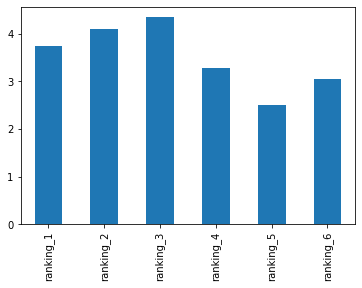

In [17]:
means = pd.Series(means)
means.plot.bar()
plt.show()

The 4th and 5th movies rank best because they have a lower average value. Hypothetically, this could well be due to higher views received by these movies as compared to others, because Star Wars has reached its popularity peak by the 4th and 5th parts. Is this (higher views) supposedly true? Let's plot the number of views by movie parts below.

#### Views by Movie 

In [18]:
seen_columns = ["seen_1", "seen_2", "seen_3", "seen_4", "seen_5", "seen_6"]

sums={}
for s in seen_columns:
    sum_ = star_wars[s].sum()
    sums[s]=sum_

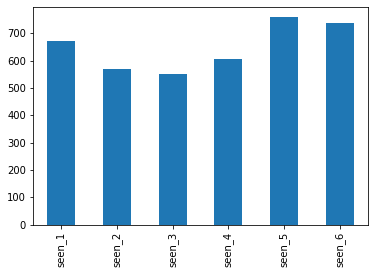

In [19]:
sums = pd.Series(sums)
sums.plot.bar()

The 5th movie ("Empire Strikes Back") has indeed been viewed more than the others, but we can't say the same about the 4th movie - its ranking is high even though it received fewer views than the first movie or the last movie. This is an indication that other factors might be at play.

#### Gender Effect

In [20]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [21]:
means_males = {}

for c in columns_:
    mean_value = males[c].mean()
    means_males[c] = mean_value
    
means_females = {}

for c in columns_:
    mean_value = females[c].mean()
    means_females[c] = mean_value

means_males = pd.Series(means_males)
means_females = pd.Series(means_females)

In [22]:
sums_males={}
for s in seen_columns:
    sum_ = males[s].sum()
    sums_males[s]=sum_
    
sums_females={}
for s in seen_columns:
    sum_ = females[s].sum()
    sums_females[s]=sum_
    
sums_males = pd.Series(sums_males)
sums_females = pd.Series(sums_females)

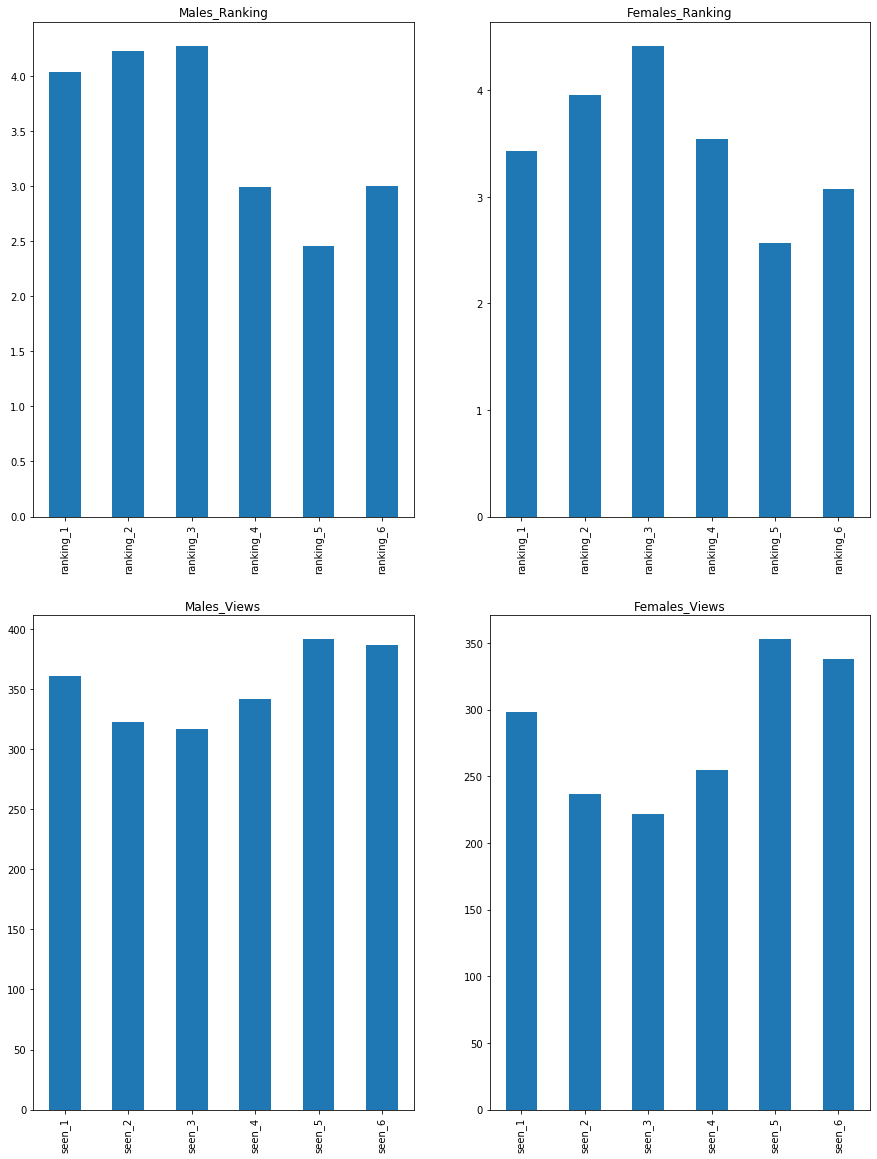

In [23]:
plt.figure(figsize=(15,20))

# sp1
plt.subplot(221)
means_males.plot.bar()
plt.title("Males_Ranking")

# sp2
plt.subplot(222)
means_females.plot.bar()
plt.title("Females_Ranking")

# sp3

plt.subplot(223)
sums_males.plot.bar()
plt.title("Males_Views")

# sp4

plt.subplot(224)
sums_females.plot.bar()
plt.title("Females_Views")


plt.show()

- Females ranked the first two movies lower than males did (also, fewer females have viewed the first two movies than males),
- Although fewer females viewed the 3rd and 4th movies, the ranking is very close to males' ranking of the same movies and is even a little higher,
- Ranking of the 5th and 6th movies are almost identical across both genders, even though fewer females have seen the 6th movie.

This is an indication that there are other, more important, factors affecting movie ranking.

#### Education Effect

In [24]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [25]:
grouped_education=star_wars.groupby("Education")[columns_].agg(np.mean)

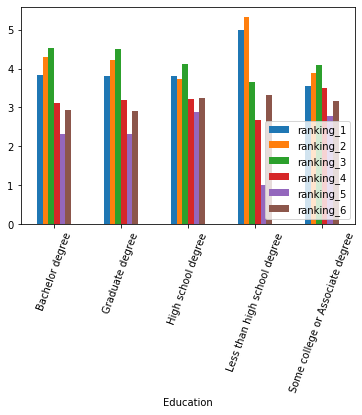

In [26]:
grouped_education.plot.bar(rot = 70)
plt.legend(loc = "lower right")
plt.show()

- An interesting fact based on the graph above: people with less than high school degree rank the 5th movie higher than people with some extra education.
- People with less than high school degree also ranked the second movie much lower than people with some extra education. 

Could this be driven by the fact that there are more views from people with low education levels?

In [27]:
grouped_education_views=star_wars.groupby("Education")[seen_columns].agg(np.sum)

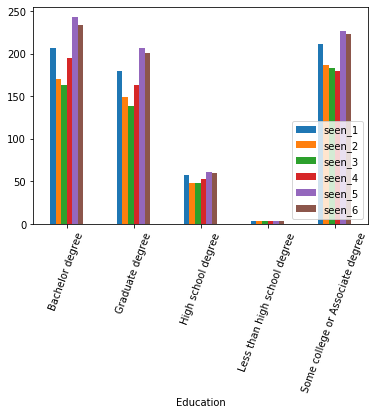

In [28]:
grouped_education_views.plot.bar(rot = 70)
plt.legend(loc = "lower right")
plt.show()

- Interestingly, the views from people with less than high school degree are much lower than from people with more education. There might be an imbalance in our dataset that skews the picture. 

#### Age Effect

In [29]:
star_wars['Age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64

In [30]:
grouped_age_means = star_wars.groupby("Age")[columns_].agg(np.mean)

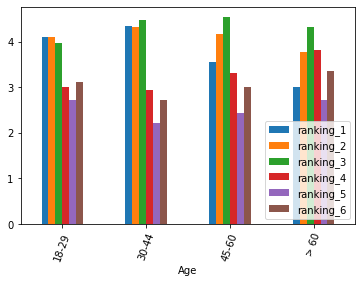

In [31]:
grouped_age_means.plot.bar(rot = 70)
plt.legend(loc = "lower right")
plt.show()

- People aged 30-44 ranked the 5th movie higher than other age groups (the lowest ranking comes from people aged 60+).
- Older people (60+) rank the first two movies much higher than other age groups.

In [34]:
grouped_age_sums = star_wars.groupby("Age")[seen_columns].agg(np.sum)

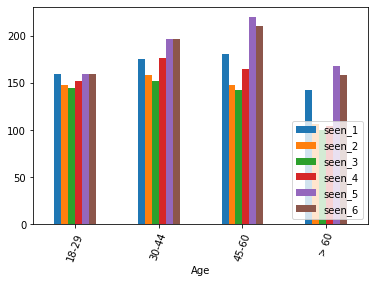

In [35]:
grouped_age_sums.plot.bar(rot = 70)
plt.legend(loc = "lower right")
plt.show()

- Views from older people (60+) are much lower than across other age groups.
- Middle-aged people viewed more of the 1st, 5th and 6th movies than other age groups.

#### Income Effect 

In [36]:
star_wars['Household Income'].value_counts()

$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64

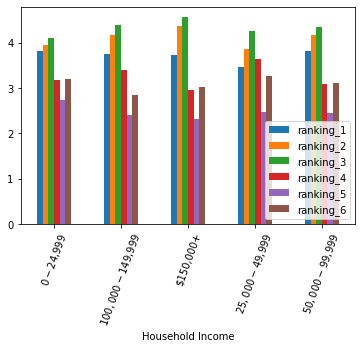

In [37]:
grouped_inc_means = star_wars.groupby("Household Income")[columns_].agg(np.mean)
grouped_inc_means.plot.bar(rot = 70)
plt.legend(loc = "lower right")
plt.show()

- People with higher income rank the 5th movie higher but overall income seems to have not much of an effect on ranking.

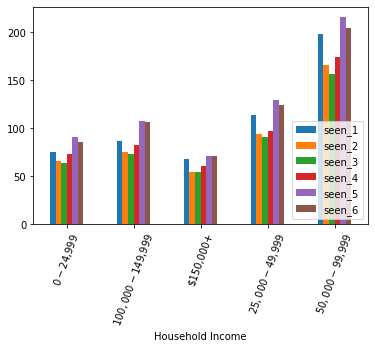

In [38]:
grouped_inc_views=star_wars.groupby("Household Income")[seen_columns].agg(np.sum)
grouped_inc_views.plot.bar(rot = 70)
plt.legend(loc = "lower right")
plt.show()

- Interestingly, the highest views come from people with the highest household income across all movies. Could this be another indication of imbalanced dataset?

#### Other patterns

Let's explore a combination of age and gender. 

##### Age and Gender

In [39]:
grouped_age_gender=star_wars.groupby(["Age", "Gender"])[columns_].agg(np.mean)

In [53]:
grouped_age_gender.reset_index(inplace=True)

In [59]:
grouped_age_gender

,Age,Gender,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,18-29,Female,3.670588,3.964706,4.000000,3.376471,2.917647,3.070588
1,18-29,Male,4.484211,4.221053,3.936842,2.652632,2.547368,3.157895
2,30-44,Female,3.763441,4.129032,4.634409,3.387097,2.354839,2.731183
3,30-44,Male,4.824561,4.456140,4.345133,2.561404,2.096491,2.701754
4,45-60,Female,3.358333,4.008333,4.600000,3.466667,2.366667,3.200000
5,45-60,Male,3.725000,4.333333,4.475000,3.150000,2.508333,2.808333
6,> 60,Female,2.989796,3.717172,4.353535,3.929293,2.717172,3.262626
7,> 60,Male,3.031915,3.808511,4.276596,3.680851,2.744681,3.457447


C:\Users\janizd\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


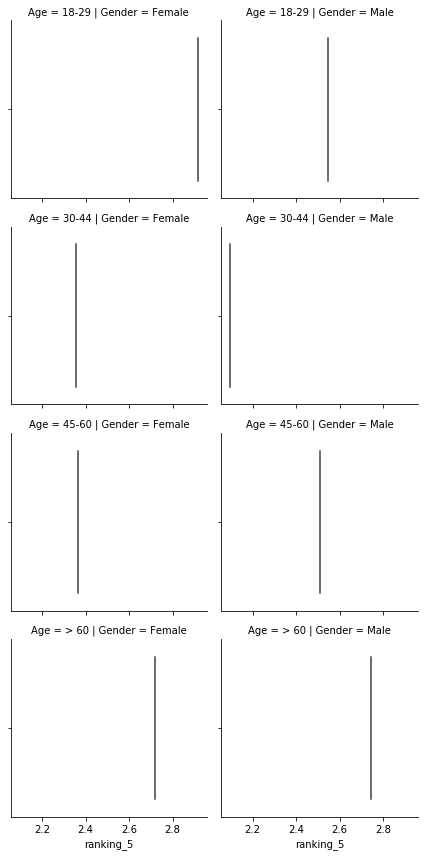

In [62]:
g = sns.FacetGrid(grouped_age_gender, row="Age", col="Gender")
g.map(sns.violinplot, "ranking_5")

- The highest ranking of the 5th movie comes from females aged 18-29 and males/females aged 60+,
- The lowest ranking of the 5th movie comes from males aged 30-44.